In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dfDrones=pd.read_csv("flights.csv")

In [4]:
dfDrones.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5


In [5]:
dfDrones.shape

(257896, 28)

In [6]:
dfDrones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257896 entries, 0 to 257895
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   flight                 257896 non-null  int64  
 1   time                   257896 non-null  float64
 2   wind_speed             257896 non-null  float64
 3   wind_angle             257896 non-null  float64
 4   battery_voltage        257896 non-null  float64
 5   battery_current        257896 non-null  float64
 6   position_x             257896 non-null  float64
 7   position_y             257896 non-null  float64
 8   position_z             257896 non-null  float64
 9   orientation_x          257896 non-null  float64
 10  orientation_y          257896 non-null  float64
 11  orientation_z          257896 non-null  float64
 12  orientation_w          257896 non-null  float64
 13  velocity_x             257896 non-null  float64
 14  velocity_y             257896 non-nu

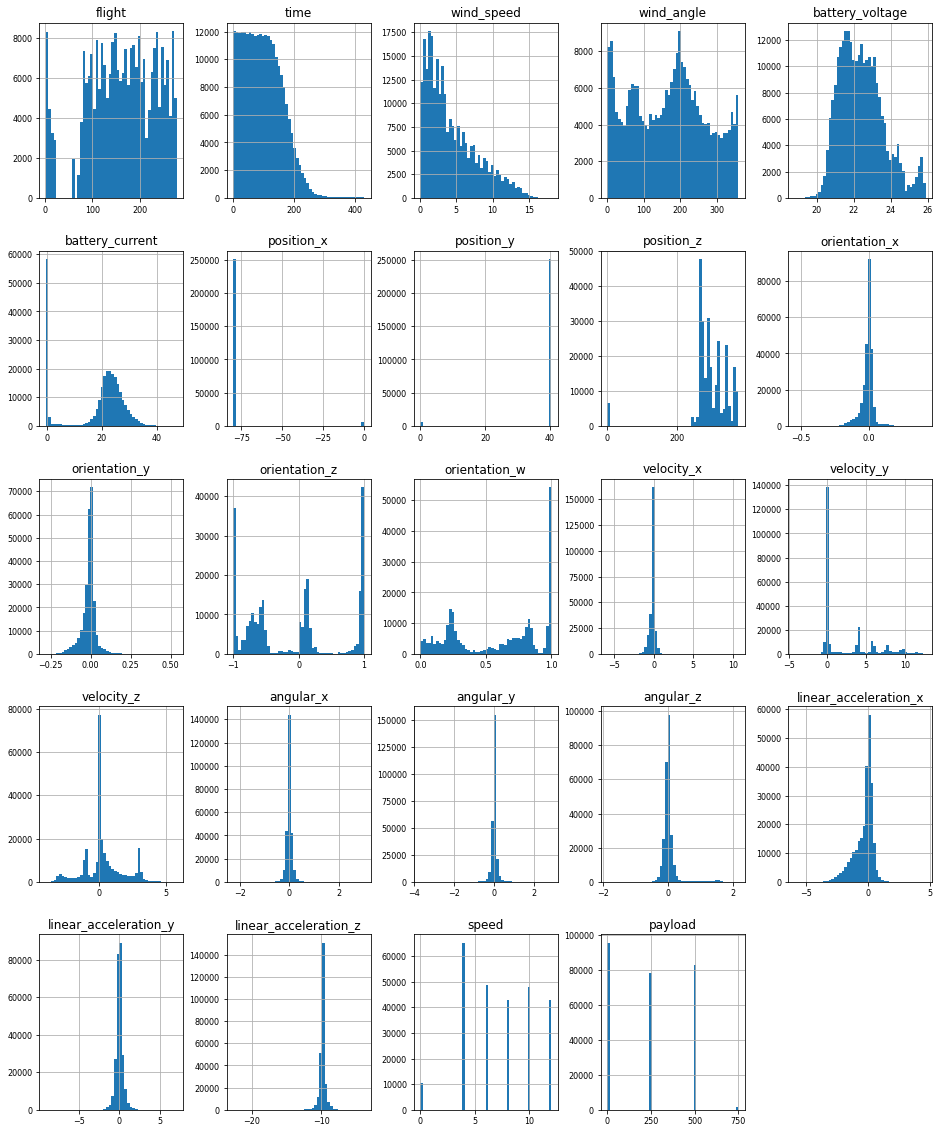

In [7]:
df_num = dfDrones.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [9]:
print('Routes')
print(*list(dfDrones.route.unique()))

Routes
R5 R2 R3 R4 R1 A1 A2 A3 H R6 R7


In [10]:
RouteR1 = dfDrones['route'].map(lambda x: x == 'R1')

In [12]:
dfDrones[RouteR1].head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
9496,8,0.0,1.9,134.0,23.344486,0.047711,-79.782799,40.459023,267.935362,0.006492,...,0.001141,-0.013122,-0.178237,-9.807006,4.0,0.0,25,2019-05-06,15:56,R1
9497,8,0.1,1.8,130.0,23.351997,0.047711,-79.782799,40.459023,267.937527,0.006485,...,0.004391,-0.008115,-0.176817,-9.807097,4.0,0.0,25,2019-05-06,15:56,R1
9498,8,0.2,1.7,126.0,23.350746,0.039759,-79.782799,40.459023,267.940363,0.006486,...,-0.001907,-0.004650,-0.169913,-9.808974,4.0,0.0,25,2019-05-06,15:56,R1
9499,8,0.4,1.7,124.0,23.349493,0.039759,-79.782799,40.459023,267.941797,0.006480,...,0.000891,-0.005500,-0.171455,-9.809250,4.0,0.0,25,2019-05-06,15:56,R1
9500,8,0.5,1.6,119.0,23.353251,0.039759,-79.782799,40.459023,267.943531,0.006513,...,0.001690,-0.011657,-0.176232,-9.806982,4.0,0.0,25,2019-05-06,15:56,R1


<AxesSubplot:xlabel='time', ylabel='position_x'>

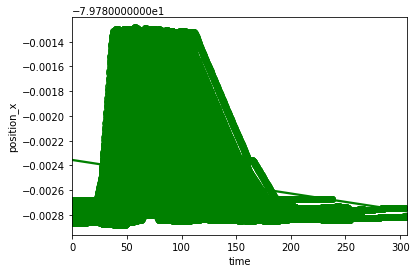

In [13]:
sns.regplot(x=dfDrones[RouteR1].time, y=dfDrones[RouteR1].position_x, color='g')

In [14]:
print('Payloads')
print(*list(dfDrones[RouteR1].payload.unique()))

Payloads
0.0 250.0 750.0 500.0


In [21]:
Payload750 = dfDrones['payload'].map(lambda x: x == 750.0)
dfDrones[Payload750].head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
21988,76,0.0,1.0,88.0,23.656246,-0.095421,-79.782749,40.458992,272.171644,0.031619,...,0.003761,0.442112,-0.453298,-9.791311,4.0,750.0,25,2019-06-11,9:36,R1
21989,76,0.1,0.9,85.0,23.654995,-0.087470,-79.782749,40.458992,272.169914,0.031617,...,-0.000314,0.441400,-0.433372,-9.789978,4.0,750.0,25,2019-06-11,9:36,R1
21990,76,0.3,0.8,83.0,23.661255,-0.071566,-79.782749,40.458992,272.166332,0.031622,...,0.000800,0.441412,-0.436207,-9.791159,4.0,750.0,25,2019-06-11,9:36,R1
21991,76,0.4,0.8,85.0,23.661255,-0.071566,-79.782749,40.458992,272.168410,0.031622,...,-0.002845,0.442088,-0.451772,-9.791480,4.0,750.0,25,2019-06-11,9:36,R1
21992,76,0.6,0.7,87.0,23.660002,-0.103373,-79.782749,40.458992,272.164075,0.031621,...,0.000915,0.440961,-0.447039,-9.790592,4.0,750.0,25,2019-06-11,9:36,R1


<AxesSubplot:xlabel='time', ylabel='position_x'>

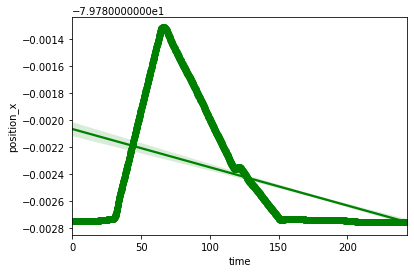

In [22]:
sns.regplot(x=dfDrones[RouteR1 & Payload750].time, y=dfDrones[RouteR1 & Payload750].position_x, color='g')

<AxesSubplot:xlabel='time', ylabel='position_y'>

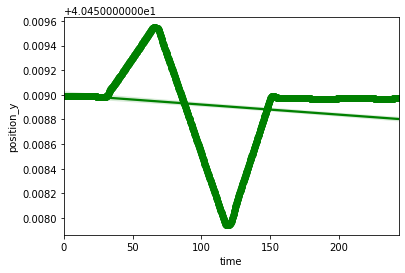

In [23]:
sns.regplot(x=dfDrones[RouteR1 & Payload750].time, y=dfDrones[RouteR1 & Payload750].position_y, color='g')

<AxesSubplot:xlabel='time', ylabel='position_z'>

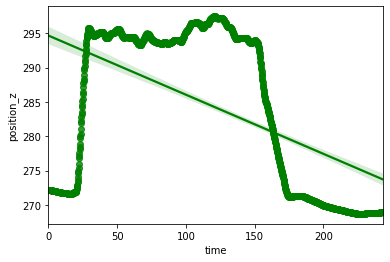

In [24]:
sns.regplot(x=dfDrones[RouteR1 & Payload750].time, y=dfDrones[RouteR1 & Payload750].position_z, color='g')

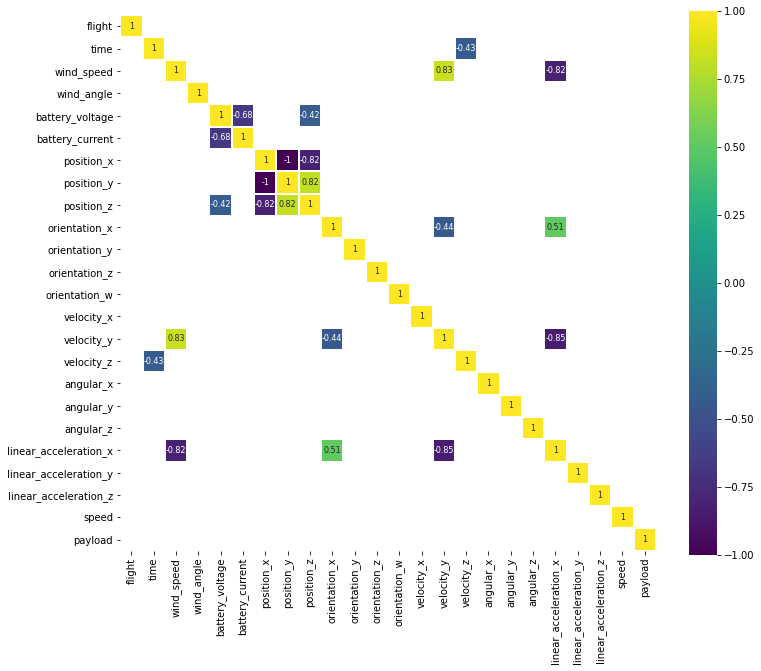

In [25]:
corr = dfDrones.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [26]:
dfDrones['battery_power']=dfDrones.battery_voltage*dfDrones.battery_current
dfDrones.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,battery_power
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5,2.118702
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5,2.311789
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5,2.311669
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5,2.311550
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5,1.925196


In [27]:
df_num = dfDrones.select_dtypes(include = ['float64', 'int64'])
df_fixed=df_num[RouteR1 & (dfDrones['payload'] == 750.0)]
df_num_corr = df_fixed.corr()['battery_power'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Battery Power:\n{}".format(len(golden_features_list), golden_features_list))

There is 9 strongly correlated values with Battery Power:
battery_current    0.999720
position_z         0.844612
wind_speed         0.671045
velocity_y         0.650868
position_x         0.532068
orientation_z      0.511086
time              -0.513095
velocity_x        -0.573153
battery_voltage   -0.945748
Name: battery_power, dtype: float64


<AxesSubplot:xlabel='time', ylabel='battery_power'>

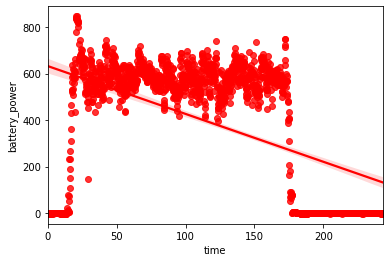

In [28]:
sns.regplot(x=dfDrones[RouteR1 & Payload750].time, y=dfDrones[RouteR1 & Payload750].battery_power, color='r')